# k-Nearest Neighbors and Classification Evaluation Metrics

This notebook covers:
1. Review of k-Nearest Neighbors (kNN) algorithm
2. Classification evaluation metrics: Accuracy, Precision, Recall, and F1-Score

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Set plotting style
# plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5)

## Review of k-Nearest Neighbors (kNN)

The k-Nearest Neighbors algorithm - which we saw in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) - is a non-parametric, instance-based learning method used for classification and regression. The algorithm works by finding the k training samples closest in distance to a new sample and predicting the class label based on a majority vote.

### Key Characteristics of kNN:

- **Non-parametric**: The algorithm doesn't make assumptions about the underlying data distribution.
- **Instance-based (lazy learning)**: No explicit training phase; the model simply stores the training data.
- **Distance-based**: Predictions are made based on the distance between points.

### The kNN Algorithm (as described in Duda et al.):

1. Store all training samples with their class labels.
2. For a new sample x:
   - Calculate the distance between x and all training samples.
   - Select the k closest training samples (k-nearest neighbors).
   - Assign the class label based on majority voting among the k neighbors.

### Distance Metrics:

The most common distance metrics used in kNN are:

1. **Euclidean Distance**: $d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$
2. **Manhattan Distance**: $d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$
3. **Minkowski Distance**: $d(x, y) = (\sum_{i=1}^{n} |x_i - y_i|^p)^{1/p}$

Let's implement and visualize the kNN algorithm:

In [2]:
# Generate a simple dataset
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=3)

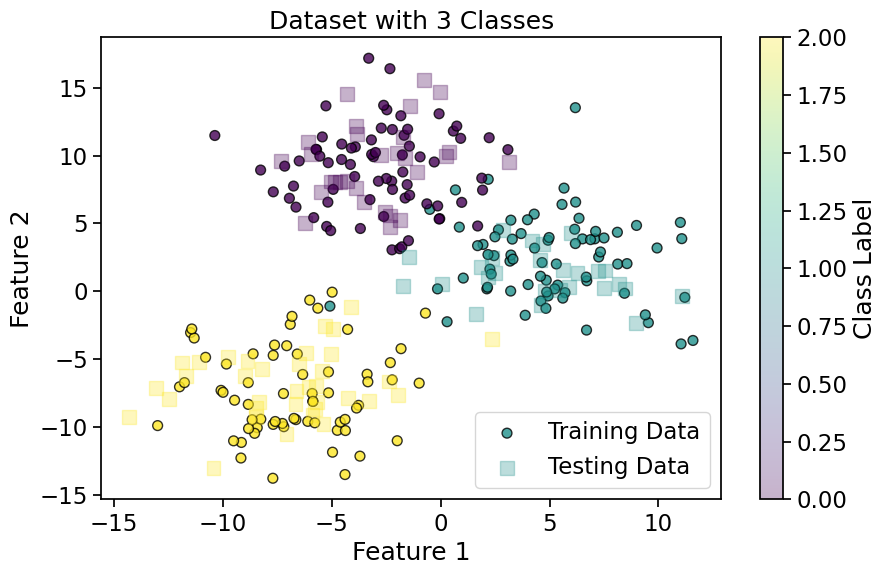

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.8, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=100, alpha=0.3, marker='s')
plt.title('Dataset with 3 Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Training Data', 'Testing Data'])
plt.colorbar(label='Class Label')
plt.show()

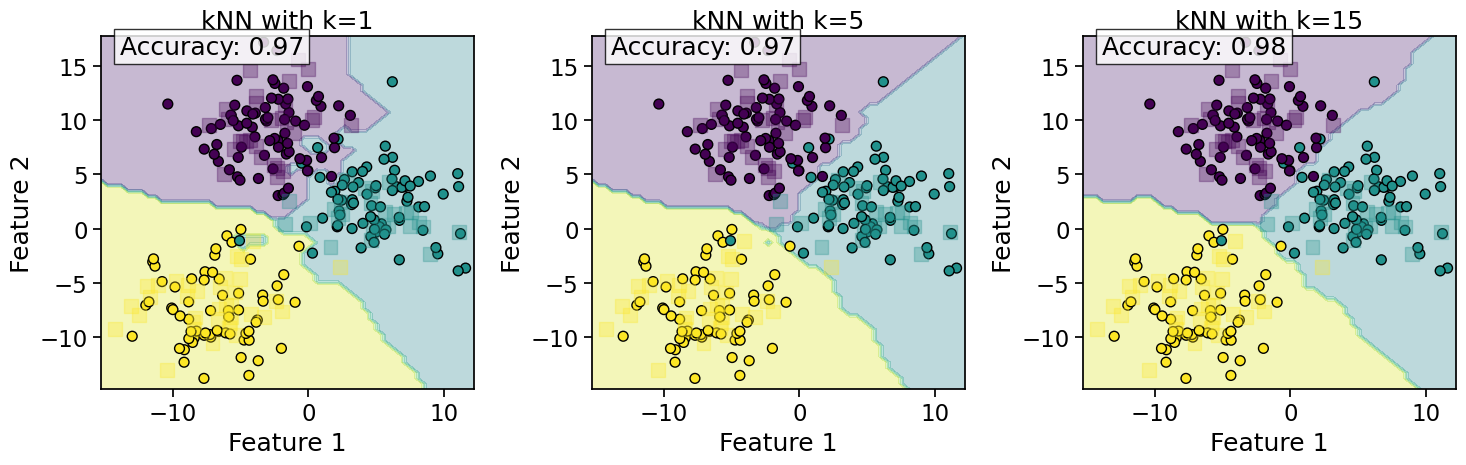

In [4]:
# Implement kNN with different values of k
k_values = [1, 5, 15]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Create a meshgrid for decision boundary visualization
h = 0.5  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i, k in enumerate(k_values):
    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on the meshgrid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundaries
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, edgecolors='k')
    axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=100, alpha=0.3, marker='s')
    axes[i].set_title(f'kNN with k={k}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    
    # Calculate and display accuracy
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    axes[i].text(0.05, 0.95, f'Accuracy: {accuracy:.2f}', transform=axes[i].transAxes, 
                 bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### Observations on kNN Behavior:

1. **Effect of k**:
   - Small k: Decision boundaries are more complex and can lead to overfitting
   - Large k: Decision boundaries are smoother but may miss important patterns

2. **Computational Complexity**:
   - Training: O(1) - just stores the data
   - Prediction: O(nd) where n is the number of training samples and d is the number of features

3. **Curse of Dimensionality**:
   - As the number of dimensions increases, the distance metric becomes less meaningful
   - In high dimensions, all points tend to be equidistant from each other

## Classification Evaluation Metrics

To evaluate the performance of classification models, we need appropriate metrics. The choice of metric depends on the problem context and the relative importance of different types of errors.

### Confusion Matrix

A confusion matrix is a table that describes the performance of a classification model. For a binary classification problem, it contains:

- **True Positives (TP)**: Correctly predicted positive cases
- **False Positives (FP)**: Incorrectly predicted positive cases (Type I error)
- **True Negatives (TN)**: Correctly predicted negative cases
- **False Negatives (FN)**: Incorrectly predicted negative cases (Type II error)

Let's create a binary classification problem using [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) and visualize its confusion matrix:

In [5]:
# Generate a binary classification dataset
X_binary, y_binary = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                                         n_redundant=0, n_clusters_per_class=1, random_state=42)

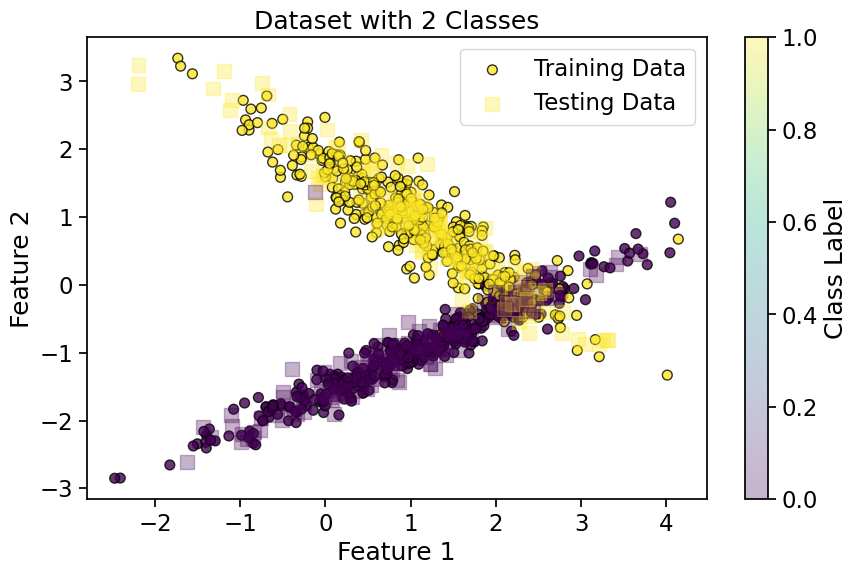

In [6]:
# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, 
                                                                     test_size=0.3, random_state=42)
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train_bin[:, 0], X_train_bin[:, 1], c=y_train_bin, cmap='viridis', s=50, alpha=0.8, edgecolors='k')
plt.scatter(X_test_bin[:, 0], X_test_bin[:, 1], c=y_test_bin, cmap='viridis', s=100, alpha=0.3, marker='s')
plt.title('Dataset with 2 Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Training Data', 'Testing Data'])
plt.colorbar(label='Class Label')
plt.show()

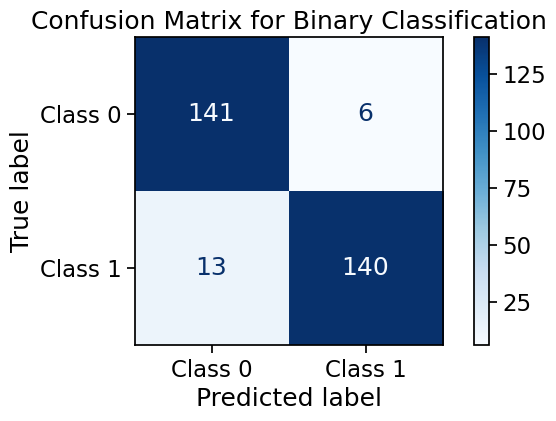

True Negatives (TN): 141
False Positives (FP): 6
False Negatives (FN): 13
True Positives (TP): 140


In [7]:
# Train a kNN classifier
knn_binary = KNeighborsClassifier(n_neighbors=5)
knn_binary.fit(X_train_bin, y_train_bin)
y_pred_bin = knn_binary.predict(X_test_bin)

# Create and display the confusion matrix
cm = confusion_matrix(y_test_bin, y_pred_bin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

fig, ax = plt.subplots(figsize=(8, 4))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Binary Classification')
plt.show()

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

### Accuracy

Accuracy is the ratio of correctly predicted instances to the total instances.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Pros**:
- Simple and intuitive
- Works well for balanced datasets

**Cons**:
- Misleading for imbalanced datasets
- Doesn't distinguish between types of errors

In [8]:
# Calculate accuracy
acc = accuracy_score(y_test_bin, y_pred_bin)
print(f"Accuracy: {acc:.4f}")

# Manual calculation
acc_manual = (tp + tn) / (tp + tn + fp + fn)
print(f"Manually calculated accuracy: {acc_manual:.4f}")

Accuracy: 0.9367
Manually calculated accuracy: 0.9367


## Precision & Recall

![](img/Precisionrecall.png)

### Precision

Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: *"Of all instances predicted as positive, how many are actually positive?"*

$$\text{Precision} = \frac{TP}{TP + FP}$$

**Key Applications and Examples**:
- **Spam Email Detection** (تشخیص ایمیل اسپم) - incorrectly flagging important emails is costly
- **Medical Testing** (آزمایش پزشکی) - avoiding false diagnoses that lead to unnecessary treatment
- **Autonomous Vehicles** (خودروهای خودران) - misidentifying obstacles could cause dangerous reactions

**Pros**:
- Critical when **false positives (FP)** have severe consequences
- Essential for applications where **incorrect positive predictions are costly**
- Particularly valuable in **information retrieval systems** where relevance is key

**Cons**:
- **Ignores false negatives** (may miss important cases)
- Can be **misleadingly high** if the model is overly conservative in predictions
- Not sufficient alone for **imbalanced datasets** where negatives dominate

In [9]:
# Calculate precision
prec = precision_score(y_test_bin, y_pred_bin)
print(f"Precision: {prec:.4f}")

# Manual calculation
prec_manual = tp / (tp + fp) if (tp + fp) > 0 else 0
print(f"Manually calculated precision: {prec_manual:.4f}")

Precision: 0.9589
Manually calculated precision: 0.9589


### Recall (Sensitivity)  

Recall is the ratio of correctly predicted positive observations to all actual positives. It answers the question: *"Of all actual positive instances, how many did we predict correctly?"*  

$$\text{Recall} = \frac{TP}{TP + FN}$$  

**Key Applications and Examples**:  
- **Medical Diagnostics** (تشخیص پزشکی)  
- **Fraud Detection** (تشخیص تقلب)  
- **Landmine Detection** (تشخیص مین‌های زمینی)  
- **Security Surveillance** (نظارت امنیتی)  
- **Earthquake Early Warning Systems** (سیستم‌های هشدار زودهنگام زلزله)  
- **Cybersecurity Threat Detection** (تشخیص تهدیدات سایبری)  
- **Search and Rescue Operations** (عملیات جستجو و نجات)  

**Pros**:  
- Critical when the cost of **false negatives (FN)** is high (e.g., life-threatening scenarios).  
- Essential for **medical screening** and **public safety applications**.  

**Cons**:  
- Does **not account for false positives (FP)** (may lead to unnecessary alerts).  
- Can be **inflated artificially** if a model labels *everything* as positive.  

**Trade-off Note**: In many real-world systems, there's an inverse relationship between precision and recall - improving one typically worsens the other. The right balance depends on which type of error (FP vs FN) is more costly for your specific application.

In [10]:
# Calculate recall
rec = recall_score(y_test_bin, y_pred_bin)
print(f"Recall: {rec:.4f}")

# Manual calculation
rec_manual = tp / (tp + fn) if (tp + fn) > 0 else 0
print(f"Manually calculated recall: {rec_manual:.4f}")

Recall: 0.9150
Manually calculated recall: 0.9150


### 2.5 F1-Score

F1-Score is the harmonic mean of Precision and Recall. It provides a balance between precision and recall.

$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

**Pros**:
- Balances precision and recall
- Works well for imbalanced datasets

**Cons**:
- May not be appropriate if one metric is more important than the other
- Doesn't consider true negatives

In [11]:
# Calculate F1-score
f1 = f1_score(y_test_bin, y_pred_bin)
print(f"F1-Score: {f1:.4f}")

# Manual calculation
f1_manual = 2 * (prec_manual * rec_manual) / (prec_manual + rec_manual) if (prec_manual + rec_manual) > 0 else 0
print(f"Manually calculated F1-Score: {f1_manual:.4f}")

F1-Score: 0.9365
Manually calculated F1-Score: 0.9365


### Precision-Recall Trade-off

There is often a trade-off between precision and recall. Increasing one typically decreases the other.

Let's visualize this trade-off by adjusting the decision threshold for a probabilistic classifier:

In [12]:
# Generate a new dataset
X_new, y_new = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                                   n_redundant=0, random_state=42, weights=[0.7, 0.3])

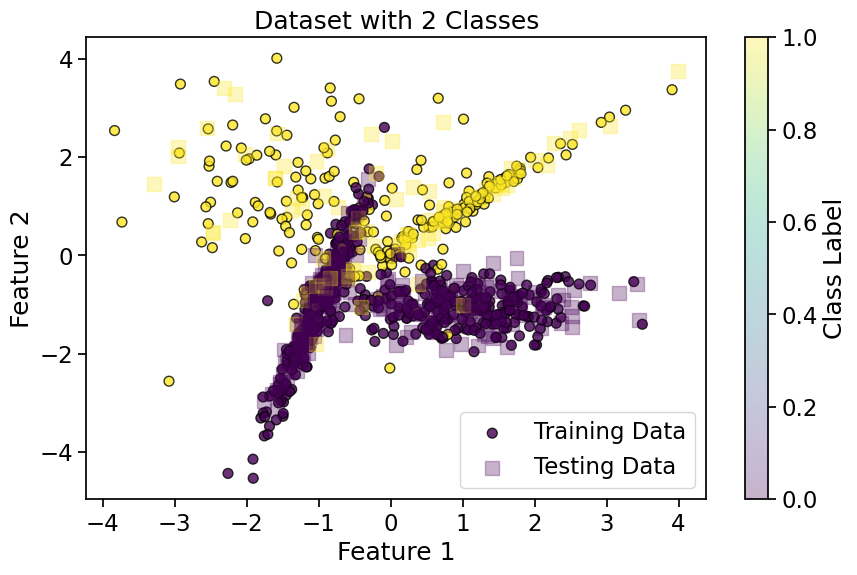

In [13]:
# Split the data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, 
                                                                     test_size=0.3, random_state=42)

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train_new[:, 0], X_train_new[:, 1], c=y_train_new, cmap='viridis', s=50, alpha=0.8, edgecolors='k')
plt.scatter(X_test_new[:, 0], X_test_new[:, 1], c=y_test_new, cmap='viridis', s=100, alpha=0.3, marker='s')
plt.title('Dataset with 2 Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Training Data', 'Testing Data'])
plt.colorbar(label='Class Label')
plt.show()

In [14]:
# Train a kNN classifier with probability estimates
from sklearn.neighbors import KNeighborsClassifier
knn_prob = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_prob.fit(X_train_new, y_train_new)

# Get probability estimates
y_proba = knn_prob.predict_proba(X_test_new)[:, 1]

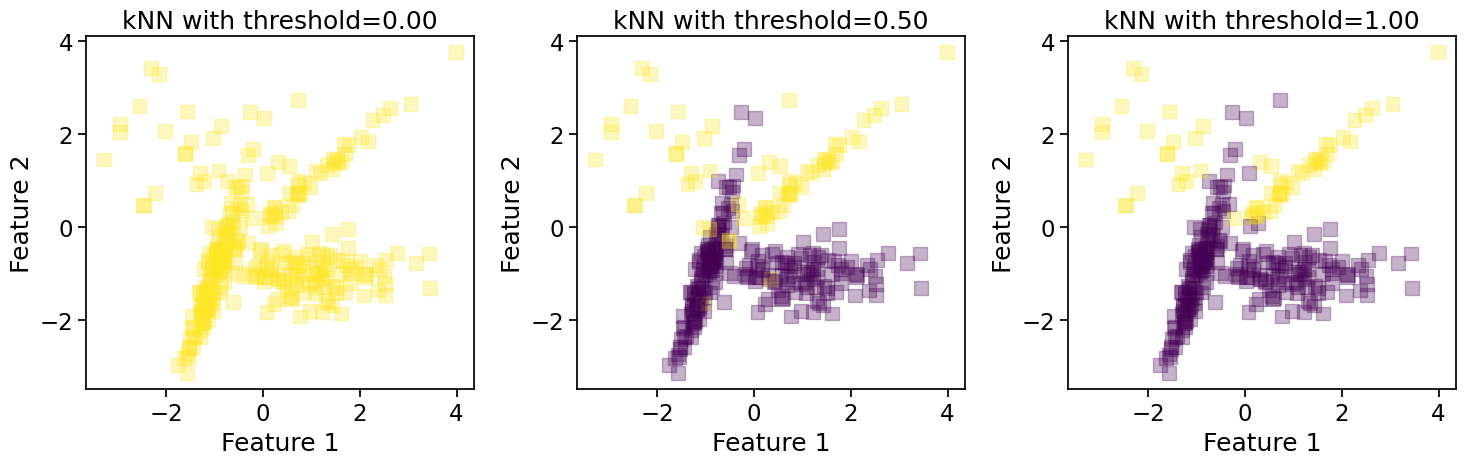

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Calculate precision and recall for different thresholds
thresholds = np.linspace(0, 1, 11)
precisions = []
recalls = []
f1_scores = []
i = 0
for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test_new, y_pred_threshold, zero_division=1))
    recalls.append(recall_score(y_test_new, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(y_test_new, y_pred_threshold, zero_division=0))
    if threshold in [0,thresholds[len(thresholds)//2],1.0]:
        axes[i].scatter(X_test_new[:, 0], X_test_new[:, 1], c=y_pred_threshold, cmap='viridis', 
                vmin=0, vmax=1, s=100, alpha=0.3, marker='s')
        axes[i].set_title(f'kNN with threshold={threshold:.2f}')
        axes[i].set_xlabel('Feature 1')
        axes[i].set_ylabel('Feature 2')
        i += 1

plt.tight_layout()
plt.show()

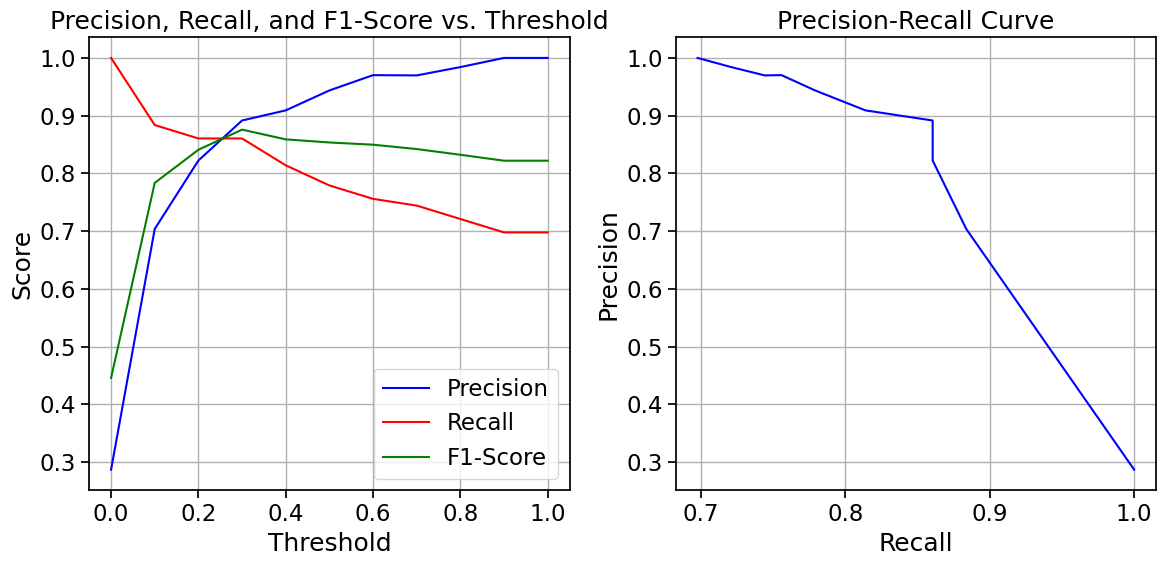

In [16]:

# Plot precision-recall trade-off
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(thresholds, precisions, 'b-', label='Precision')
plt.plot(thresholds, recalls, 'r-', label='Recall')
plt.plot(thresholds, f1_scores, 'g-', label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recalls, precisions, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

plt.tight_layout()
plt.show()

### Choosing the Right Metric

The choice of evaluation metric depends on the specific problem and the relative costs of different types of errors:

- **Accuracy**: Use when classes are balanced and all types of errors have similar costs
- **Precision**: Use when false positives are more costly (e.g., spam detection)
- **Recall**: Use when false negatives are more costly (e.g., disease detection)
- **F1-Score**: Use when you need a balance between precision and recall

## Further Reading

### Metrics for Multi-class Classification

For multi-class problems, these metrics can be extended using different averaging strategies:

- **Macro-averaging**: Calculate the metric for each class and take the average (treats all classes equally)
- **Micro-averaging**: Calculate the metric using the total true positives, false positives, etc. (biased toward larger classes)
- **Weighted-averaging**: Calculate the metric for each class and take the weighted average based on class frequency

In [17]:
# Multi-class metrics example
# Using the original multi-class dataset
knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train, y_train)
y_pred_multi = knn_multi.predict(X_test)

# Calculate metrics with different averaging strategies
precision_macro = precision_score(y_test, y_pred_multi, average='macro')
precision_micro = precision_score(y_test, y_pred_multi, average='micro')
precision_weighted = precision_score(y_test, y_pred_multi, average='weighted')

recall_macro = recall_score(y_test, y_pred_multi, average='macro')
recall_micro = recall_score(y_test, y_pred_multi, average='micro')
recall_weighted = recall_score(y_test, y_pred_multi, average='weighted')

f1_macro = f1_score(y_test, y_pred_multi, average='macro')
f1_micro = f1_score(y_test, y_pred_multi, average='micro')
f1_weighted = f1_score(y_test, y_pred_multi, average='weighted')

# Display results in a table
metrics_df = pd.DataFrame({
    'Macro': [precision_macro, recall_macro, f1_macro],
    'Micro': [precision_micro, recall_micro, f1_micro],
    'Weighted': [precision_weighted, recall_weighted, f1_weighted]
}, index=['Precision', 'Recall', 'F1-Score'])

print("Multi-class Classification Metrics:")
print(metrics_df.round(4))

Multi-class Classification Metrics:
            Macro   Micro  Weighted
Precision  0.9652  0.9667    0.9677
Recall     0.9648  0.9667    0.9667
F1-Score   0.9645  0.9667    0.9666


## Summary

In this notebook, we've covered:

1. **k-Nearest Neighbors (kNN)**:
   - A non-parametric, instance-based learning algorithm
   - Uses distance metrics to find the k closest training examples
   - Makes predictions based on majority voting
   - The choice of k affects the complexity of decision boundaries

2. **Classification Evaluation Metrics**:
   - Confusion Matrix: A table showing the counts of true/false positives/negatives
   - Accuracy: The proportion of correct predictions
   - Precision: The proportion of true positives among predicted positives
   - Recall: The proportion of true positives among actual positives
   - F1-Score: The harmonic mean of precision and recall
   - Precision-Recall Trade-off: Adjusting the decision threshold affects precision and recall

These concepts form the foundation for understanding classification algorithms and evaluating their performance. In the next notebook, we'll explore Voronoi diagrams and their connection to kNN and Bayesian decision theory.

## References

1. Duda, R. O., Hart, P. E., & Stork, D. G. (2001). Pattern Classification (2nd ed.). Wiley-Interscience.
2. [Precision and Recall - Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)
3. [Confusion Matrix - Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)
4. [Scikit-learn Documentation - Model Evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)